# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.express as px 
import plotly.graph_objects as go

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

# <font color = green> For Q1, let us go through step by step, for the remaining questions, we will just use functions when we can </font>

In [3]:
# yfinance dowwnload DOES NOT include the end date

start="2011-08-01"
end="2020-08-01"

In [4]:
SMA=42
BB_threshold=2

In [5]:
tickers=["GOOGL"]

In [6]:
Google = yf.download(tickers, 
                     start=start, 
                     end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
Google=Google[["Adj Close"]]

In [8]:
Google["SMA"]=\
    (
        Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .mean()
    )

In [9]:
# Note that standard deviation is calculated using the original price series, not the SMA

Google["Upper_Band"]=\
    (
        Google["SMA"]
        +
        Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .std()
        *BB_threshold
    )


Google["Lower_Band"]=\
    (
        Google["SMA"]
        -Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .std()
        *BB_threshold
    )

In [10]:
Google.dropna(inplace=True)

#### Our trading strategy here is that we want to be holding short positions when prices are above the band and holding long positions when prices are below the band. When prices are within the band, we want to be flat (hold no positions)

In [11]:
# Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
Google["Position"]=\
    (
        np.where(Google["Adj Close"] 
                 > 
                 Google["Upper_Band"],
                 -1,
                 0))

# Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
Google["Position"]=\
    (
        np.where(Google["Adj Close"] 
                 < 
                 Google["Lower_Band"],
                 1,
                 Google["Position"])
    )

In [12]:
Google["Trades"] =\
(
    Google["Position"]
    .diff()
)

In [13]:
Google

Adj Close        SMA  Upper_Band  Lower_Band  Position  Trades
Date                                                                      
2011-09-28  13.201545  13.502358   14.741357   12.263358         0     NaN
2011-09-29  13.168095  13.455243   14.583542   12.326943         0     0.0
2011-09-30  12.857053  13.409263   14.470376   12.348149         0     0.0
2011-10-03  12.369771  13.346468   14.329388   12.363549         0     0.0
2011-10-04  12.529036  13.301523   14.256136   12.346909         0     0.0
...               ...        ...         ...         ...       ...     ...
2020-07-27  76.282608  73.188262   78.155870   68.220654         0     0.0
2020-07-28  74.996796  73.289689   78.226064   68.353315         0     0.0
2020-07-29  75.987343  73.396556   78.368289   68.424823         0     0.0
2020-07-30  76.728516  73.519466   78.560550   68.478382         0     0.0
2020-07-31  74.213737  73.573665   78.593956   68.553375         0     0.0

[2225 rows x 6 columns]

### <font color = red> Answer 1 is presented in the cell below: </font>

In [14]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["SMA"], 
        mode='lines', 
        line=dict(color='green', width=0.75), 
        name='SMA'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band"], 
        mode='lines', 
        line=dict(color='red', dash='dash', width=0.75), 
        name='Upper Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band"], 
        mode='lines', 
        line=dict(color='blue', dash='dash', width=0.75), 
        name='Lower Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Position"], 
        mode='lines', 
        line=dict(color='orange', width=0.75), 
        name='Position',
        yaxis='y2'  # Assign to secondary axis
    )
)

fig.update_layout(
    title='Stock Price, Indicators, and Position',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    yaxis2=dict(
        title="Position", 
        overlaying='y', 
        side='right'
    ),
    width=1400,  
    height=600,  
    legend=dict(
        x=0.5,
        y=1.15,
        xanchor='center',
        yanchor='top',
        orientation='h',
        traceorder='normal',
        bordercolor='Black',
        borderwidth=1
    )
)

# Show figure
fig.show()

In [15]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Lower Band'
    )
)
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Upper Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades == 1.0].index, 
        y=Google.Lower_Band[Google.Trades == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades == -1.0].index, 
        y=Google.Upper_Band[Google.Trades == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Stock Price with Buy/Sell Signals',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1400,  
    height=600   
)

# Show figure
fig.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

In [16]:
def calculate_BB_Sharpe_ratio (tickers=tickers, 
                               start=start, 
                               end=end, 
                               window: int=SMA, 
                               min_periods: int=SMA, 
                               BB_threshold: int=BB_threshold):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = \
        (
            BB_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    BB_df.dropna(inplace=True)

    # Calculate the Sharpe ratio
    Sharpe =\
    (
        (
        BB_df["strategy_returns"].mean() 
        / 
        BB_df["strategy_returns"].std()
        ) * np.sqrt(252)
    )
    
    print (f"The Sharpe of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days and threshold of {BB_threshold} SD is {Sharpe:.2f}")
    
    return BB_df


In [17]:
Apple = calculate_BB_Sharpe_ratio(tickers="AAPL", 
                                  start=start, 
                                  end=end, 
                                  window=SMA, 
                                  min_periods=SMA, 
                                  BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AAPL over this time period with a window of 42 days and threshold of 2 SD is 0.18


In [18]:
Amazon = calculate_BB_Sharpe_ratio(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AMZN over this time period with a window of 42 days and threshold of 2 SD is -0.13


### <font color = red> Answer 2 </font>

    The answer is Apple .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [19]:
initial_capital = 200000
commission = 0

In [20]:
def calculate_BB_capital (tickers=tickers, 
                          start=start, 
                          end=end, 
                          window: int=SMA, 
                          min_periods: int=SMA, 
                          BB_threshold: int=BB_threshold, 
                          initial_capital: int=initial_capital, 
                          commission: int=commission):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = BB_df["strategy_returns"].cumsum().apply(np.exp)

    BB_df.dropna(inplace=True)
    
    BB_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    BB_df.iloc[0, BB_df.columns.get_loc("Capital")] = initial_capital
    
    for row in range(1, len(BB_df)):
        
        Trade=abs(BB_df.iloc[row, BB_df.columns.get_loc("Trades")])

        # Update the capital based on the previous capital and strategy returns
        BB_df.iloc[row, BB_df.columns.get_loc("Capital")] = BB_df.iloc[row-1, BB_df.columns.get_loc("Capital")] * \
            (np.exp(BB_df.iloc[row, BB_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=BB_df.iloc[-1, BB_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days, threshold of {BB_threshold} SD and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return BB_df

In [21]:
Google = calculate_BB_capital(tickers="GOOGL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on GOOGL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $237007.88


In [22]:
Apple = calculate_BB_capital(tickers="AAPL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on AAPL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $241992.11


In [23]:
Amazon = calculate_BB_capital(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on AMZN over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $173822.06


### <font color = red> Answer 3 </font>

    GOOGL : $237,007.88 
    
    AAPL  : $241,990.69 
     
    AMZN  : $173,822.06 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [24]:
def calculate_CAGR (BB_df:pd.DataFrame,
                    name:str):
    
    '''
    BB_df: Dataframe that you want to calculate CAGR for
    name: Name of the stock you are performing the BB strategy on
    '''
    
    Days =\
    (
        (
            BB_df
            .index[-1]
            - 
            BB_df
            .index[0]     
        ).days
    )

    CAGR=\
    (
        (
            (
                (BB_df["Capital"][-1] / BB_df["Capital"][0])  
            ) ** (365.0 / Days)
        ) -1
    )*100
    
    print (f'The CAGR of {name} using a BB strategy is {CAGR:.2f}% ')

In [25]:
calculate_CAGR (BB_df=Google, 
                name="Google")

The CAGR of Google using a BB strategy is 1.94% 


In [26]:
calculate_CAGR (BB_df=Apple, 
                name="Apple")

The CAGR of Apple using a BB strategy is 2.18% 


In [27]:
calculate_CAGR (BB_df=Amazon, 
                name="Amazon")

The CAGR of Amazon using a BB strategy is -1.57% 


### <font color = red> Answer 4 </font>

    GOOGL : 1.94% 
    
    AAPL  : 2.18% 
    
    AMZN  : -1.57% 

## 👇 Questions 5 and 7 ask you to predict the future market direction. Let's focus on analyzing `GE`. `These questions are designed to help deepen your understanding of the key points covered in the Lesson 5 lecture notes`. While answering, please make sure to revisit and refer to the `Lecture 5 notebook`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

# <font color = green> Let us do step by step for lag 3 before using function for lag 10 and 22.</font>

In [28]:
# Assume same time period of analysis as previous questions. Remember yfinance doesnt download end date
start="2011-08-01"
end="2020-08-01"

In [29]:
tickers=["GE"]

In [30]:
GE = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [31]:
GE=GE[["Adj Close"]]

In [32]:
GE["log_returns"] =\
    (
        np
        .log(GE["Adj Close"] / GE["Adj Close"].shift(1)
            )
    )

In [33]:
GE = GE.dropna()

In [34]:
LAGS = 3

In [35]:
COLS = []

In [36]:
for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    GE[COL] = GE["log_returns"].shift(LAG)
    COLS.append(COL)

In [37]:
GE = GE.dropna()

In [38]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3
Date                                                            
2011-08-05  60.227493     0.002426 -0.058944  0.014994 -0.043213
2011-08-08  56.287727    -0.067652  0.002426 -0.058944  0.014994
2011-08-09  58.221157     0.033772 -0.067652  0.002426 -0.058944
2011-08-10  55.047443    -0.056053  0.033772 -0.067652  0.002426
2011-08-11  57.199730     0.038354 -0.056053  0.033772 -0.067652
...               ...          ...       ...       ...       ...
2020-07-27  32.847607    -0.022109 -0.025901 -0.002837  0.002837
2020-07-28  33.728771     0.026472 -0.022109 -0.025901 -0.002837
2020-07-29  32.260174    -0.044518  0.026472 -0.022109 -0.025901
2020-07-30  30.644714    -0.051373 -0.044518  0.026472 -0.022109
2020-07-31  29.714602    -0.030822 -0.051373 -0.044518  0.026472

[2262 rows x 5 columns]

### <font color = red>Note that you are doing your regression across the entire time series at once, there is look-ahead bias in your results</font>

In [39]:
# Note that there is no constant term in this 

OLS =\
    np \
    .linalg \
    .lstsq(GE[COLS],
           GE["log_returns"],
           rcond = None)[0]

OLS

array([-0.038,  0.06 ,  0.016])

In [40]:
GE["PREDICTION"] =\
    np \
    .dot(GE[COLS],
         OLS)


In [41]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION
Date                                                                        
2011-08-05  60.227493     0.002426 -0.058944  0.014994 -0.043213    0.002426
2011-08-08  56.287727    -0.067652  0.002426 -0.058944  0.014994   -0.003362
2011-08-09  58.221157     0.033772 -0.067652  0.002426 -0.058944    0.001749
2011-08-10  55.047443    -0.056053  0.033772 -0.067652  0.002426   -0.005282
2011-08-11  57.199730     0.038354 -0.056053  0.033772 -0.067652    0.003034
...               ...          ...       ...       ...       ...         ...
2020-07-27  32.847607    -0.022109 -0.025901 -0.002837  0.002837    0.000863
2020-07-28  33.728771     0.026472 -0.022109 -0.025901 -0.002837   -0.000751
2020-07-29  32.260174    -0.044518  0.026472 -0.022109 -0.025901   -0.002753
2020-07-30  30.644714    -0.051373 -0.044518  0.026472 -0.022109    0.002910
2020-07-31  29.714602    -0.030822 -0.051373 -0.044518  0.026472   -0.000265

[2262 rows x 6 columns]

<Axes: xlabel='Date'>

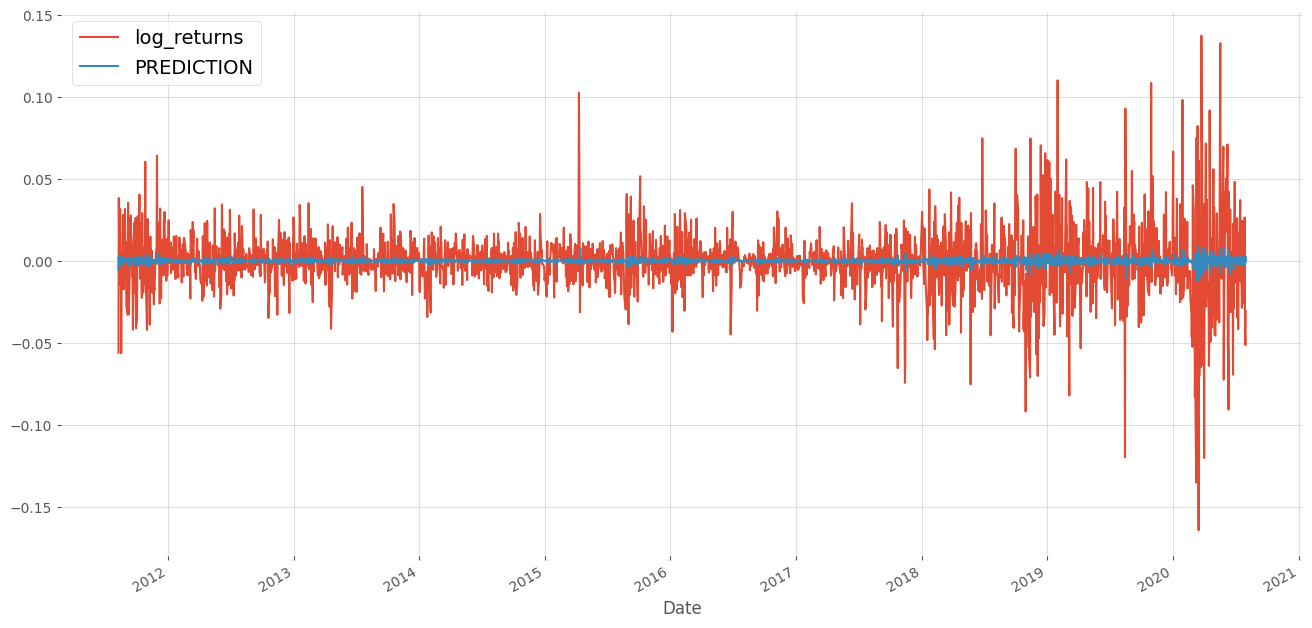

In [42]:
GE \
    [["log_returns", "PREDICTION"]] \
    .iloc[LAGS: ] \
    .plot(figsize = (16, 8)
         )

In [43]:
GE["PREDICTED_DIRECTION"]=np.sign(GE["PREDICTION"])

In [44]:
GE["STRATEGY"] = GE["PREDICTED_DIRECTION"] * GE["log_returns"]

In [45]:
GE["STRATEGY_CUMULATIVE_RETURNS"] = \
    (
    GE["STRATEGY"].cumsum()
    .apply(np.exp)
    )

In [46]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION  \
Date                                                                           
2011-08-05  60.227493     0.002426 -0.058944  0.014994 -0.043213    0.002426   
2011-08-08  56.287727    -0.067652  0.002426 -0.058944  0.014994   -0.003362   
2011-08-09  58.221157     0.033772 -0.067652  0.002426 -0.058944    0.001749   
2011-08-10  55.047443    -0.056053  0.033772 -0.067652  0.002426   -0.005282   
2011-08-11  57.199730     0.038354 -0.056053  0.033772 -0.067652    0.003034   
...               ...          ...       ...       ...       ...         ...   
2020-07-27  32.847607    -0.022109 -0.025901 -0.002837  0.002837    0.000863   
2020-07-28  33.728771     0.026472 -0.022109 -0.025901 -0.002837   -0.000751   
2020-07-29  32.260174    -0.044518  0.026472 -0.022109 -0.025901   -0.002753   
2020-07-30  30.644714    -0.051373 -0.044518  0.026472 -0.022109    0.002910   
2020-07-31  29.714602    -0.030822 -0.051373 -0.044518  0.026472   -0.000265   

            PREDICTED_DIRECTION  STRATEGY  STRATEGY_CUMULATIVE_RETURNS  
Date                                                                    
2011-08-05                  1.0  0.002426                     1.002429  
2011-08-08                 -1.0  0.067652                     1.072592  
2011-08-09                  1.0  0.033772                     1.109434  
2011-08-10                 -1.0  0.056053                     1.173398  
2011-08-11                  1.0  0.038354                     1.219276  
...                         ...       ...                          ...  
2020-07-27                  1.0 -0.022109                     1.571969  
2020-07-28                 -1.0 -0.026472                     1.530902  
2020-07-29                 -1.0  0.044518                     1.600594  
2020-07-30                  1.0 -0.051373                     1.520442  
2020-07-31                 -1.0  0.030822                     1.568035  

[2262 rows x 9 columns]

In [47]:
#ACCURACY =\
np \
.sign(GE["log_returns"] * GE["PREDICTION"]
     ) \
.value_counts(normalize=True)

 1.0    0.502210
-1.0    0.480990
 0.0    0.016799
Name: proportion, dtype: float64

In [48]:
GE \
    [["log_returns", "STRATEGY"]] \
    .sum() \
    .apply(np.exp)

log_returns    0.494571
STRATEGY       1.568035
dtype: float64

<Axes: xlabel='Date'>

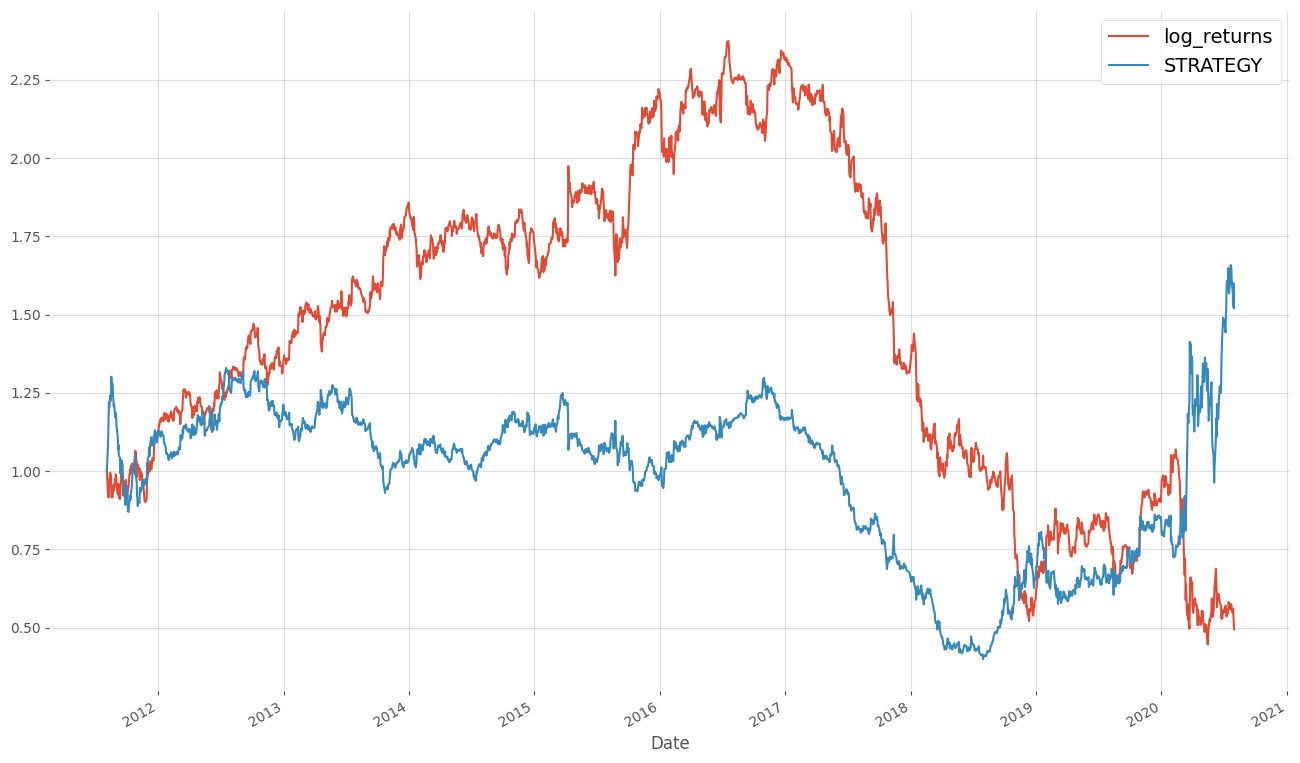

In [49]:
GE \
    [["log_returns", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

In [50]:
def calculate_regression_returns (tickers=tickers, start=start, end=end, LAGS=LAGS):
    
    # Download price data
    regression_df = yf.download(tickers, start=start, end=end)
    regression_df=regression_df[["Adj Close"]]
    
    # Calculate log returns
    regression_df["log_returns"] =\
    (
        np
        .log(regression_df["Adj Close"] / regression_df["Adj Close"].shift(1)
            )
    )
    
    regression_df = regression_df.dropna()
    
    # Create lagged returns columns
    COLS = []
    
    for LAG in range(1, LAGS + 1):
        COL = f"lag_{LAG}"
        regression_df[COL] = regression_df["log_returns"].shift(LAG)
        COLS.append(COL)
        
    regression_df = regression_df.dropna()
    
    # Note the lookahead bias problem here
    # Perform OLS regression using lstsq
    OLS =\
        np \
        .linalg \
        .lstsq(regression_df[COLS],
               regression_df["log_returns"],
               rcond = None)[0]
    
    # Make predictions
    regression_df["PREDICTION"] =\
        np \
        .dot(regression_df[COLS],
             OLS)
    
    # Predict direction (sign of predicted returns)
    regression_df["PREDICTED_DIRECTION"]=np.sign(regression_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    regression_df["STRATEGY"] = \
        (
        regression_df["PREDICTED_DIRECTION"] * 
        regression_df["log_returns"]
        )
    
    regression_df["STRATEGY_CUMULATIVE_RETURNS"] = \
        (
        regression_df["STRATEGY"].cumsum()
        .apply(np.exp)
        )
     
    ACCURACY =\
        np \
        .sign(regression_df["log_returns"] * regression_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
       
    print(ACCURACY) 
    
    # Plot predicted against actual returns  
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200,  
        height=500
    )

    fig.show()
    
    # To plot cumulative returns of strategy and underlying asset
    cumulative_returns = \
        (
            regression_df[["log_returns", "STRATEGY"]]
            .dropna()
            .cumsum()
            .apply(np.exp)
        )
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200,  
        height=600
    )

    fig.show()
       
    return regression_df

### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

In [51]:
GE_lag3 = calculate_regression_returns (tickers="GE", 
                                        start=start, 
                                        end=end, 
                                        LAGS=3)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.502210
-1.0    0.480990
 0.0    0.016799
Name: proportion, dtype: float64


In [52]:
GE_lag10 = calculate_regression_returns (tickers="GE", 
                                         start=start, 
                                         end=end, 
                                         LAGS=10)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.503769
-1.0    0.479379
 0.0    0.016851
Name: proportion, dtype: float64


# <font color = red>The OLS overfits to the periods of higher volatility as it tries to reduce least squares, that is why your returns are so good during Covid, because that is when volatility is highest</font>

In [53]:
GE_lag22 = calculate_regression_returns (tickers="GE", 
                                         start=start, 
                                         end=end, 
                                         LAGS=22)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.505573
-1.0    0.477486
 0.0    0.016942
Name: proportion, dtype: float64


# Rolling Regression

#### What if we try regression without lookahead bias?

In [54]:
import math
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [55]:
start="2011-08-01"
end="2020-08-01"

In [56]:
rolling_window=252
LAGS = 3

In [57]:
tickers=["GE"]

In [58]:
GE_rolling = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [59]:
GE_rolling=GE_rolling[["Adj Close"]]

In [60]:
GE_rolling["log_returns"] =\
(
    np
    .log(GE_rolling["Adj Close"] / GE_rolling["Adj Close"].shift(1)
        )
)

In [61]:
GE_rolling = GE_rolling.dropna()

In [62]:
# Create lagged returns columns
COLS = []

for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    GE_rolling[COL] = GE_rolling["log_returns"].shift(LAG)
    COLS.append(COL)

In [63]:
GE_rolling = GE_rolling.dropna()

In [64]:
GE_rolling

Adj Close  log_returns     lag_1     lag_2     lag_3
Date                                                            
2011-08-05  60.227493     0.002426 -0.058944  0.014994 -0.043213
2011-08-08  56.287727    -0.067652  0.002426 -0.058944  0.014994
2011-08-09  58.221157     0.033772 -0.067652  0.002426 -0.058944
2011-08-10  55.047443    -0.056053  0.033772 -0.067652  0.002426
2011-08-11  57.199730     0.038354 -0.056053  0.033772 -0.067652
...               ...          ...       ...       ...       ...
2020-07-27  32.847607    -0.022109 -0.025901 -0.002837  0.002837
2020-07-28  33.728771     0.026472 -0.022109 -0.025901 -0.002837
2020-07-29  32.260174    -0.044518  0.026472 -0.022109 -0.025901
2020-07-30  30.644714    -0.051373 -0.044518  0.026472 -0.022109
2020-07-31  29.714602    -0.030822 -0.051373 -0.044518  0.026472

[2262 rows x 5 columns]

In [65]:
# Define endogenous and exogenous variables for regression
endog = GE_rolling["log_returns"]
exog = GE_rolling[COLS]

In [66]:
endog

Date
2011-08-05    0.002426
2011-08-08   -0.067652
2011-08-09    0.033772
2011-08-10   -0.056053
2011-08-11    0.038354
                ...   
2020-07-27   -0.022109
2020-07-28    0.026472
2020-07-29   -0.044518
2020-07-30   -0.051373
2020-07-31   -0.030822
Name: log_returns, Length: 2262, dtype: float64

In [67]:
exog

lag_1     lag_2     lag_3
Date                                    
2011-08-05 -0.058944  0.014994 -0.043213
2011-08-08  0.002426 -0.058944  0.014994
2011-08-09 -0.067652  0.002426 -0.058944
2011-08-10  0.033772 -0.067652  0.002426
2011-08-11 -0.056053  0.033772 -0.067652
...              ...       ...       ...
2020-07-27 -0.025901 -0.002837  0.002837
2020-07-28 -0.022109 -0.025901 -0.002837
2020-07-29  0.026472 -0.022109 -0.025901
2020-07-30 -0.044518  0.026472 -0.022109
2020-07-31 -0.051373 -0.044518  0.026472

[2262 rows x 3 columns]

In [68]:
# Rolling regression
# Note that no intercept is added
rols = RollingOLS(endog, exog, window=rolling_window)
rres = rols.fit()

In [69]:
rres.params

lag_1     lag_2     lag_3
Date                                    
2011-08-05       NaN       NaN       NaN
2011-08-08       NaN       NaN       NaN
2011-08-09       NaN       NaN       NaN
2011-08-10       NaN       NaN       NaN
2011-08-11       NaN       NaN       NaN
...              ...       ...       ...
2020-07-27 -0.114420  0.101078  0.056531
2020-07-28 -0.116043  0.098490  0.056261
2020-07-29 -0.118366  0.100574  0.060054
2020-07-30 -0.112229  0.097532  0.062413
2020-07-31 -0.107466  0.102830  0.059068

[2262 rows x 3 columns]

In [70]:
GE_rolling[COLS]

lag_1     lag_2     lag_3
Date                                    
2011-08-05 -0.058944  0.014994 -0.043213
2011-08-08  0.002426 -0.058944  0.014994
2011-08-09 -0.067652  0.002426 -0.058944
2011-08-10  0.033772 -0.067652  0.002426
2011-08-11 -0.056053  0.033772 -0.067652
...              ...       ...       ...
2020-07-27 -0.025901 -0.002837  0.002837
2020-07-28 -0.022109 -0.025901 -0.002837
2020-07-29  0.026472 -0.022109 -0.025901
2020-07-30 -0.044518  0.026472 -0.022109
2020-07-31 -0.051373 -0.044518  0.026472

[2262 rows x 3 columns]

## <font color = red>BE VERY CAREFUL IN THE BELOW CELL. YOUR REGRESSION COEFFICIENTS FOR TODAY CAN ONLY BE APPLIED TOMORROW. DO NOT APPLY YOUR REGRESSION COEFFICIENTS FROM TODAY TO PREDICT TODAY'S RETURNS</font>

In [71]:
# Make predictions

GE_rolling["PREDICTION"]=np.nan

for row in range(1,len(GE_rolling)):                         # Start from second row, as you wont have params for first row
    GE_rolling.iloc[row, GE_rolling.columns.get_loc("PREDICTION")] = \
        (
            np.dot
            (
                rres.params.iloc[row-1,:],                   # Previous day's parameters multiplied by the lagged values
                GE_rolling[COLS].iloc[row].values   
            )
        )

In [72]:
# Predict direction (sign of predicted returns)
GE_rolling["PREDICTED_DIRECTION"]=np.sign(GE_rolling["PREDICTION"])

In [73]:
# Strategy returns based on predicted direction
GE_rolling["STRATEGY"] = GE_rolling["PREDICTED_DIRECTION"] * GE_rolling["log_returns"]

In [74]:
GE_rolling["STRATEGY_CUMULATIVE_RETURNS"] = \
(
    GE_rolling["STRATEGY"]
    .cumsum()
    .apply(np.exp)
)

In [75]:
ACCURACY =\
        np \
        .sign(GE_rolling["log_returns"] * GE_rolling["PREDICTION"]
            ) \
        .value_counts(normalize=True)

print(ACCURACY)

-1.0    0.498507
 1.0    0.485572
 0.0    0.015920
Name: proportion, dtype: float64


In [76]:
GE_rolling["STOCK_CUMULATIVE_RETURNS"]= \
    (
        GE_rolling["log_returns"]
        .cumsum()
        .apply(np.exp)
    )

In [77]:
GE_rolling

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION  \
Date                                                                           
2011-08-05  60.227493     0.002426 -0.058944  0.014994 -0.043213         NaN   
2011-08-08  56.287727    -0.067652  0.002426 -0.058944  0.014994         NaN   
2011-08-09  58.221157     0.033772 -0.067652  0.002426 -0.058944         NaN   
2011-08-10  55.047443    -0.056053  0.033772 -0.067652  0.002426         NaN   
2011-08-11  57.199730     0.038354 -0.056053  0.033772 -0.067652         NaN   
...               ...          ...       ...       ...       ...         ...   
2020-07-27  32.847607    -0.022109 -0.025901 -0.002837  0.002837    0.002889   
2020-07-28  33.728771     0.026472 -0.022109 -0.025901 -0.002837   -0.000249   
2020-07-29  32.260174    -0.044518  0.026472 -0.022109 -0.025901   -0.006707   
2020-07-30  30.644714    -0.051373 -0.044518  0.026472 -0.022109    0.006604   
2020-07-31  29.714602    -0.030822 -0.051373 -0.044518  0.026472    0.003076   

            PREDICTED_DIRECTION  STRATEGY  STRATEGY_CUMULATIVE_RETURNS  \
Date                                                                     
2011-08-05                  NaN       NaN                          NaN   
2011-08-08                  NaN       NaN                          NaN   
2011-08-09                  NaN       NaN                          NaN   
2011-08-10                  NaN       NaN                          NaN   
2011-08-11                  NaN       NaN                          NaN   
...                         ...       ...                          ...   
2020-07-27                  1.0 -0.022109                     0.809667   
2020-07-28                 -1.0 -0.026472                     0.788515   
2020-07-29                 -1.0  0.044518                     0.824411   
2020-07-30                  1.0 -0.051373                     0.783128   
2020-07-31                  1.0 -0.030822                     0.759358   

            STOCK_CUMULATIVE_RETURNS  
Date                                  
2011-08-05                  1.002429  
2011-08-08                  0.936855  
2011-08-09                  0.969035  
2011-08-10                  0.916212  
2011-08-11                  0.952034  
...                              ...  
2020-07-27                  0.546717  
2020-07-28                  0.561383  
2020-07-29                  0.536940  
2020-07-30                  0.510052  
2020-07-31                  0.494571  

[2262 rows x 10 columns]

In [78]:
def calculate_rolling_regression_returns (tickers=tickers, 
                                          start=start, 
                                          end=end, 
                                          LAGS=LAGS, 
                                          rolling_window=rolling_window):
    
    # Download price data
    regression_df = yf.download(tickers, start=start, end=end)
    regression_df=regression_df[["Adj Close"]]
    
    # Calculate log returns
    regression_df["log_returns"] =\
    (
        np
        .log(regression_df["Adj Close"] / regression_df["Adj Close"].shift(1)
            )
    )
    
    regression_df = regression_df.dropna()
    
    # Create lagged returns columns
    COLS = []
    
    for LAG in range(1, LAGS + 1):
        COL = f"lag_{LAG}"
        regression_df[COL] = regression_df["log_returns"].shift(LAG)
        COLS.append(COL)
        
    regression_df = regression_df.dropna()
    
    # Define endogenous and exogenous variables for regression
    endog = regression_df["log_returns"]
    exog = regression_df[COLS]
    
    # Rolling regression
    rols = RollingOLS(endog, exog, window=rolling_window)
    rres = rols.fit()
    
    # Make predictions
    regression_df["PREDICTION"]=np.nan
    for row in range(len(regression_df)):
        regression_df.iloc[row,regression_df.columns.get_loc("PREDICTION")] = math.sumprod(rres.params.iloc[row,:],regression_df[COLS].iloc[row,:])
    
    for row in range(1,len(regression_df)):                     # Start from second row, as you wont have params for first row
        regression_df.iloc[row, regression_df.columns.get_loc("PREDICTION")] = \
            (
                np.dot
                (
                    rres.params.iloc[row-1,:],                   # Previous day's parameters multiplied by the lagged values
                    regression_df[COLS].iloc[row].values   
                )
            )
    
    # Predict direction (sign of predicted returns)
    regression_df["PREDICTED_DIRECTION"]=np.sign(regression_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    regression_df["STRATEGY"] = regression_df["PREDICTED_DIRECTION"] * regression_df["log_returns"]
    
    regression_df["STRATEGY_CUMULATIVE_RETURNS"] = regression_df["STRATEGY"].cumsum().apply(np.exp)
    
    ACCURACY =\
        np \
        .sign(regression_df["log_returns"] * regression_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
    print(ACCURACY)
    
    # Plot predicted returns against actual returns
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200, 
        height=500
    )

    fig.show()
    
    # Plot cumulative returns of strategy against underlying asset
    cumulative_returns = \
        (
            regression_df[["log_returns", "STRATEGY"]]
            .dropna()
            .cumsum()
            .apply(np.exp)
        )
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200,  
        height=600
    )

    fig.show()
    
    return regression_df

In [79]:
GE_rolling_lag3 = calculate_rolling_regression_returns(tickers="GE", 
                                                       start=start, 
                                                       end=end, 
                                                       LAGS=3, 
                                                       rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


-1.0    0.498507
 1.0    0.485572
 0.0    0.015920
Name: proportion, dtype: float64


In [80]:
GE_rolling_lag10 = calculate_rolling_regression_returns(tickers="GE", 
                                                        start=start, 
                                                        end=end, 
                                                        LAGS=10, 
                                                        rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


-1.0    0.492262
 1.0    0.491762
 0.0    0.015976
Name: proportion, dtype: float64


In [81]:
GE_rolling_lag22 = calculate_rolling_regression_returns(tickers="GE", 
                                                        start=start, 
                                                        end=end, 
                                                        LAGS=22, 
                                                        rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.496735
-1.0    0.487192
 0.0    0.016072
Name: proportion, dtype: float64


# LSTM

#### <font color = red>Quick example, there is no train-test split, the LSTM model has also seen the entire dataset, so just like the initial regression there is also look-ahead bias</font>

In [82]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [83]:
# Assume same time period of analysis as previous questions. Remember yfinance doesnt download end date
start="2011-08-01"
end="2020-08-01"

In [84]:
tickers=["GE"]

In [85]:
n_steps = 3
n_features = 1

In [86]:
GE_LSTM = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [87]:
GE_LSTM=GE_LSTM[["Adj Close"]]

In [88]:
# Calculate log returns
GE_LSTM["log_returns"] =\
(
    np
    .log(GE_LSTM["Adj Close"] / GE_LSTM["Adj Close"].shift(1)
        )
)

In [89]:
GE_LSTM = GE_LSTM.dropna()

In [90]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [91]:
# split into samples
X, y = split_sequence(GE_LSTM["log_returns"], n_steps)

In [92]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [93]:
X

array([[[-0.043],
        [ 0.015],
        [-0.059]],

       [[ 0.015],
        [-0.059],
        [ 0.002]],

       [[-0.059],
        [ 0.002],
        [-0.068]],

       ...,

       [[-0.026],
        [-0.022],
        [ 0.026]],

       [[-0.022],
        [ 0.026],
        [-0.045]],

       [[ 0.026],
        [-0.045],
        [-0.051]]])

In [94]:
len(X)

2262

In [95]:
y

array([ 0.002, -0.068,  0.034, ..., -0.045, -0.051, -0.031])

In [96]:
len(y)

2262

In [97]:
# define model
model = Sequential()

model.add(LSTM(50, 
               activation='relu', 
               return_sequences=False, 
               input_shape=(n_steps, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', 
              loss='mse')

In [98]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [99]:
GE_LSTM["PREDICTION"]=np.nan
for row in range (n_steps,len(GE_LSTM)):
    x_input=X[row-n_steps]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    GE_LSTM.iloc[row, GE_LSTM.columns.get_loc("PREDICTION")]=yhat

In [100]:
GE_LSTM

Adj Close  log_returns  PREDICTION
Date                                          
2011-08-02  62.781086    -0.043213         NaN
2011-08-03  63.729504     0.014994         NaN
2011-08-04  60.081577    -0.058944         NaN
2011-08-05  60.227493     0.002426   -0.004767
2011-08-08  56.287727    -0.067652   -0.006851
...               ...          ...         ...
2020-07-27  32.847607    -0.022109   -0.001228
2020-07-28  33.728771     0.026472   -0.001071
2020-07-29  32.260174    -0.044518   -0.001405
2020-07-30  30.644714    -0.051373   -0.004140
2020-07-31  29.714602    -0.030822   -0.003205

[2265 rows x 3 columns]

In [101]:
# Predict direction (sign of predicted returns)
GE_LSTM["PREDICTED_DIRECTION"]=np.sign(GE_LSTM["PREDICTION"])

In [102]:
# Strategy returns based on predicted direction
GE_LSTM["STRATEGY"] = GE_LSTM["PREDICTED_DIRECTION"] * GE_LSTM["log_returns"]

In [103]:
GE_LSTM=GE_LSTM.dropna()

In [104]:
GE_LSTM["STRATEGY_CUMULATIVE_RETURNS"] = GE_LSTM["STRATEGY"].cumsum().apply(np.exp)

In [105]:
ACCURACY =\
        np \
        .sign(GE_LSTM["log_returns"] * GE_LSTM["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
print(ACCURACY)

 1.0    0.501326
-1.0    0.481874
 0.0    0.016799
Name: proportion, dtype: float64


In [106]:
GE_LSTM

Adj Close  log_returns  PREDICTION  PREDICTED_DIRECTION  STRATEGY  \
Date                                                                            
2011-08-05  60.227493     0.002426   -0.004767                 -1.0 -0.002426   
2011-08-08  56.287727    -0.067652   -0.006851                 -1.0  0.067652   
2011-08-09  58.221157     0.033772   -0.003864                 -1.0 -0.033772   
2011-08-10  55.047443    -0.056053   -0.010176                 -1.0  0.056053   
2011-08-11  57.199730     0.038354   -0.004702                 -1.0 -0.038354   
...               ...          ...         ...                  ...       ...   
2020-07-27  32.847607    -0.022109   -0.001228                 -1.0  0.022109   
2020-07-28  33.728771     0.026472   -0.001071                 -1.0 -0.026472   
2020-07-29  32.260174    -0.044518   -0.001405                 -1.0  0.044518   
2020-07-30  30.644714    -0.051373   -0.004140                 -1.0  0.051373   
2020-07-31  29.714602    -0.030822   -0.003205                 -1.0  0.030822   

            STRATEGY_CUMULATIVE_RETURNS  
Date                                     
2011-08-05                     0.997577  
2011-08-08                     1.067401  
2011-08-09                     1.031954  
2011-08-10                     1.091451  
2011-08-11                     1.050382  
...                                 ...  
2020-07-27                     4.801525  
2020-07-28                     4.676085  
2020-07-29                     4.888957  
2020-07-30                     5.146682  
2020-07-31                     5.307782  

[2262 rows x 6 columns]

<Axes: xlabel='Date'>

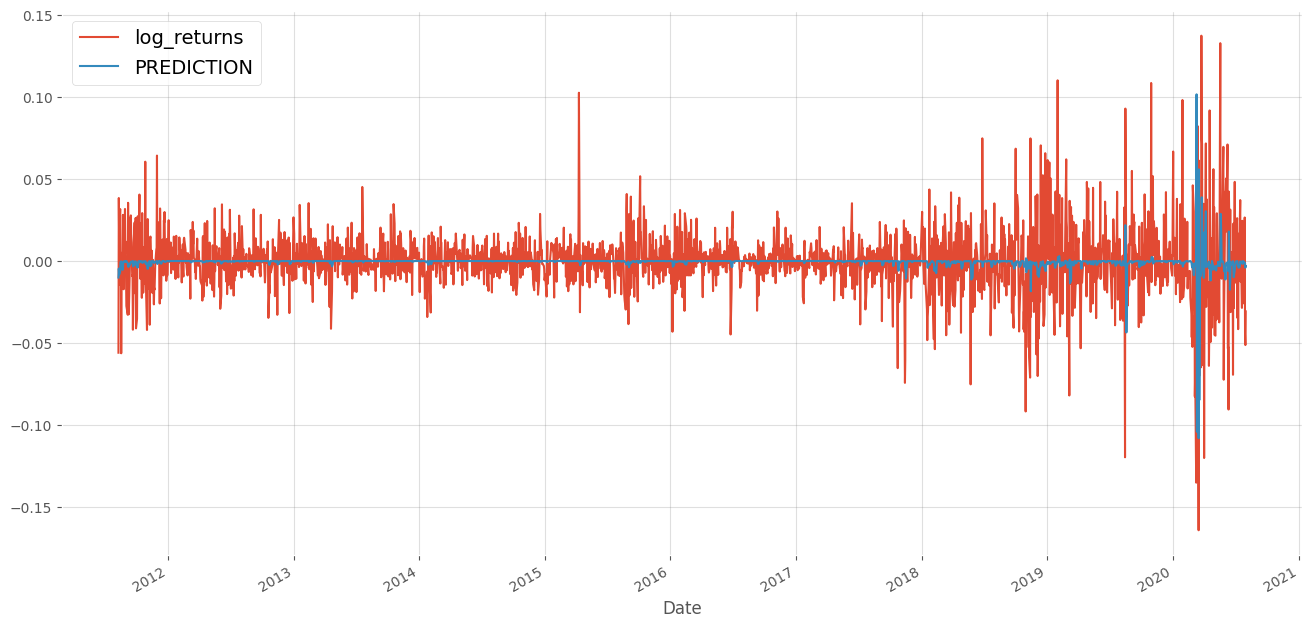

In [107]:
GE_LSTM \
    [["log_returns", "PREDICTION"]] \
    .iloc[LAGS: ] \
    .plot(figsize = (16, 8)
        )

<Axes: xlabel='Date'>

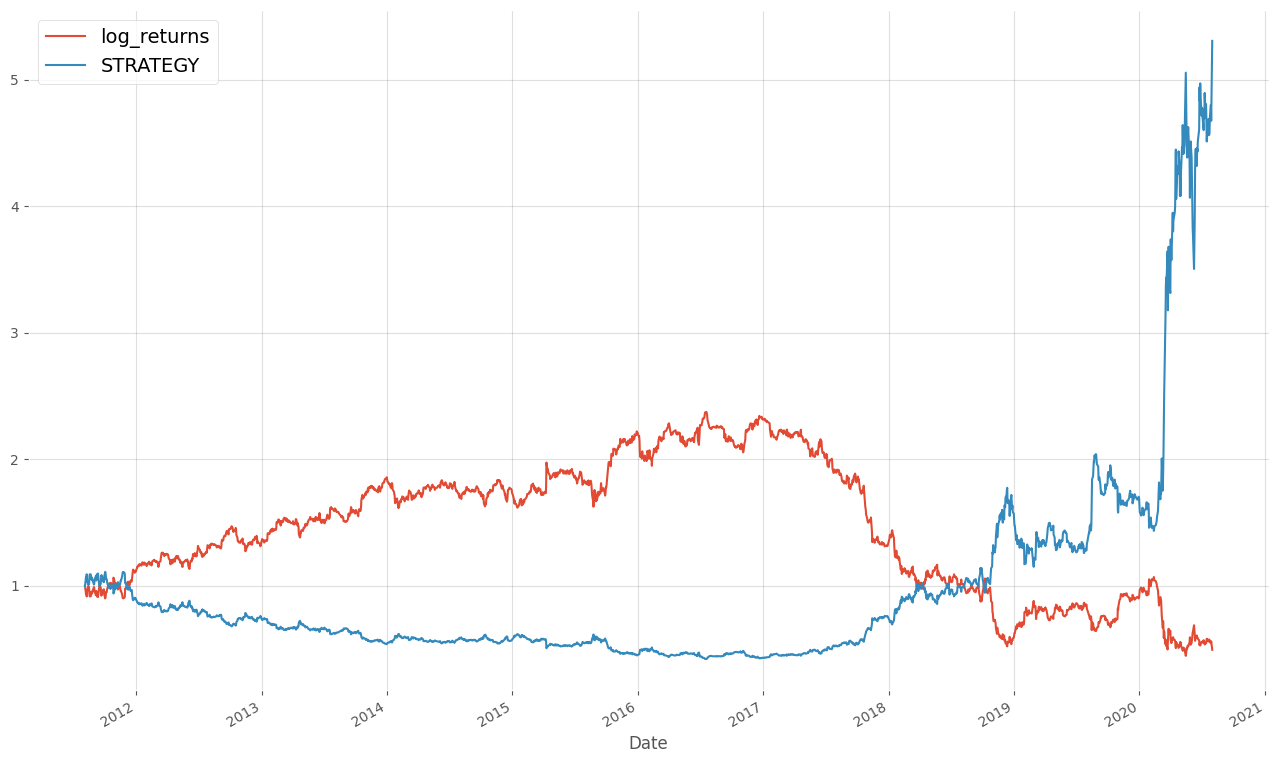

In [108]:
# Plot cumulative returns for both actual and strategy
GE_LSTM \
    [["log_returns", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
        )

In [109]:
def calculate_LSTM_returns (tickers=tickers, 
                            start=start, 
                            end=end, 
                            n_steps=n_steps):
    
    # Download price data
    LSTM_df = yf.download(tickers, start=start, end=end)
    LSTM_df=LSTM_df[["Adj Close"]]
    
    # Calculate log returns
    LSTM_df["log_returns"] =\
    (
        np
        .log(LSTM_df["Adj Close"] / LSTM_df["Adj Close"].shift(1)
            )
    )
    
    LSTM_df = LSTM_df.dropna()
    
    X, y = list(), list()
    for i in range(len(LSTM_df["log_returns"])):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(LSTM_df["log_returns"])-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = LSTM_df["log_returns"][i:end_ix], LSTM_df["log_returns"][end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X=array(X)
    y=array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # fit model
    model.fit(X, y, epochs=200, verbose=0)

    LSTM_df["PREDICTION"]=np.nan
    for row in range (n_steps,len(LSTM_df)):
        x_input=X[row-n_steps]
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        LSTM_df.iloc[row, LSTM_df.columns.get_loc("PREDICTION")]=yhat


    
    # Predict direction (sign of predicted returns)
    LSTM_df["PREDICTED_DIRECTION"]=np.sign(LSTM_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    LSTM_df["STRATEGY"] = LSTM_df["PREDICTED_DIRECTION"] * LSTM_df["log_returns"]
    
    LSTM_df["STRATEGY_CUMULATIVE_RETURNS"] = LSTM_df["STRATEGY"].cumsum().apply(np.exp)
    
    ACCURACY =\
        np \
        .sign(LSTM_df["log_returns"] * LSTM_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
    print(ACCURACY)
    
    
    # Plot predicted returns against actual returns
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=LSTM_df.index[LAG:], 
        y=LSTM_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=LSTM_df.index[LAG:], 
        y=LSTM_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200, 
        height=500
    )

    fig.show()
    
    # Plot cumulative returns of strategy against underlying asset
    cumulative_returns = LSTM_df[["log_returns", "STRATEGY"]].dropna().cumsum().apply(np.exp)
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200, 
        height=600
    )

    fig.show()
        
    return LSTM_df

In [110]:
GE_LSTM_lag3 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=3)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.503979
-1.0    0.479222
 0.0    0.016799
Name: proportion, dtype: float64


In [111]:
GE_LSTM_lag10 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=10)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.511308
-1.0    0.471840
 0.0    0.016851
Name: proportion, dtype: float64


In [112]:
GE_LSTM_lag22 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=22)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.496656
-1.0    0.486402
 0.0    0.016942
Name: proportion, dtype: float64


###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In Chapter 4 of the Lesson 5 lecture note, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [113]:
'''
This is better from a mathematical standpoint, as we are performing a regression (predicting continuous variables) 
but how would you choose your tolerance level though?

Anyway, a glance at the chart already tells you your predicted returns are near zero and very much less volatile than the actual returns. 
So for any reasonable tolerance level, it would depend more on the actual returns being near zero rather than the predicted returns, 
for the prediction to be considered "accurate"

Anyway this is untradable, unless you buy 0DTE options that gives the highest payout if your predicted returns materalizes.
Or you come up with a rule that says predicted amount has to be above a certain threshold for you to buy or below a certain threshold for you to sell.
'''

def calculate_accuracy_A(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [114]:
'''
This is better for classification problem rather than regression, calculating true positive, true negative, false positive, false negative
Can calculate precision/recall and F1 scores for this. 
There is less subjectivity in the accuracy score, it is not subject to an arbitrary threshold.
It is easier to trade on as well, if predicted returns is positive, we go long, if predicted returns is negative, we go short.
Considering our trading rule in question 5, this would be the better function
'''

def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

In [115]:
def modified_calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return total_correct,total_incorrect,accuracy_B

### Below are the lines of code that lead to an answer:

In [116]:
modified_calculate_accuracy_B(GE_lag3["log_returns"],
                              GE_lag3["PREDICTION"])

(1136, 1126, 0.502210433244916)

In [117]:
modified_calculate_accuracy_B(GE_lag10["log_returns"],
                              GE_lag10["PREDICTION"])

(1136, 1119, 0.503769401330377)

In [118]:
modified_calculate_accuracy_B(GE_lag22["log_returns"],
                              GE_lag22["PREDICTION"])

(1134, 1109, 0.5055728934462773)

### <font color = red> Answer 6 </font>
    The prediction is 1129 times correct and 1132 wrong. The accuracy is 49.93 % with a 3-day lag.
    
    The prediction is 1137 times correct and 1117 wrong. The accuracy is 50.44 % with a 10-day lag.
    
    The prediction is 1130 times correct and 1112 wrong. The accuracy is 50.40 % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [119]:
def calculate_regression_Sharpe (dataframe:pd.DataFrame, 
                                 lag:int):

    Sharpe =\
        (
            (
            dataframe["STRATEGY"].mean() 
            / 
            dataframe["STRATEGY"].std()
            ) * np.sqrt(252)
        )
        
    print(f'The Sharpe Ratio from a {lag} day linear regression was {Sharpe:.2f}')

In [120]:
calculate_regression_Sharpe(dataframe=GE_lag3, 
                            lag=3)

The Sharpe Ratio from a 3 day linear regression was 0.16


In [121]:
calculate_regression_Sharpe(dataframe=GE_lag10, 
                            lag=10)

The Sharpe Ratio from a 10 day linear regression was 0.30


In [122]:
calculate_regression_Sharpe(dataframe=GE_lag22, 
                            lag=22)

The Sharpe Ratio from a 22 day linear regression was 0.66


### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.05 .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.35 .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.60 .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [123]:
# yfinance dowwnload DOES NOT include the end date

start="2013-11-01"
end="2021-11-01"

In [124]:
SMA = 24
LMA = 58

In [125]:
def Momentum_Strategy (tickers=tickers, 
                       start=start, 
                       end=end, 
                       SMA=SMA, 
                       LMA=LMA):
    
    '''
    tickers: Single Ticker that you want to calculate drawdown for
    start: Start of analysis period
    end: End of analysis period
    SMA: Short Moving Average
    LMA: Long Moving Average
    '''
    
    # Download price data
    Momentum_df = yf.download(tickers, 
                              start=start, 
                              end=end)
    
    Momentum_df=Momentum_df[["Adj Close"]]
    
    # Calculate the SMA and LMA
    Momentum_df["SMA"]=\
        (
            Momentum_df["Adj Close"]
            .rolling(window=SMA,min_periods=SMA)
            .mean()
        )
        
    Momentum_df["LMA"]=\
        (
            Momentum_df["Adj Close"]
            .rolling(window=LMA,min_periods=LMA)
            .mean()
        )

    # Enter long position (1) when SMA is above the LMA. 
    Momentum_df["Position"]=\
        (
            np.where(Momentum_df["SMA"] 
                     > 
                     Momentum_df["LMA"],
                     1, 
                     0)
        )

    # Enter short position (-1) when SMA is below the LMA. 
    Momentum_df["Position"]=\
        (
            np.where(Momentum_df["SMA"] 
                     <
                     Momentum_df["LMA"],
                     -1,
                     Momentum_df["Position"])
        )

    Momentum_df["Trades"] =\
    (
        Momentum_df["Position"]
        .diff()
    )

    Momentum_df["log_returns"] =\
    (
        np
        .log(Momentum_df["Adj Close"] / Momentum_df["Adj Close"].shift(1)
            )
    )

    Momentum_df["strategy_returns"] =\
    (
        Momentum_df["Position"]
        .shift(1) 
        * 
        Momentum_df["log_returns"]
    )

    Momentum_df["strategy_cumulative_returns"] = \
        (
            Momentum_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    # Drop rows with NaN values
    Momentum_df.dropna(inplace=True)
    
    Momentum_df["MAX_GROSS_PERFORMANCE"]=\
    (
        Momentum_df
            ["strategy_cumulative_returns"]
            .cummax()
    )
    
    # Note that Drawdown here is calculated as ((Current Value/Max Value)-1)
    Momentum_df["Drawdown"] =\
    (
        Momentum_df["strategy_cumulative_returns"]/Momentum_df["MAX_GROSS_PERFORMANCE"] - 1
    )

    Momentum_df['MaxDrawdown'] = Momentum_df['Drawdown'].cummin()
    
    # Initialize 'HighWaterMarkDate' column with NaN or stock_data_IBM's index, which is likely the date
    Momentum_df['HighWaterMarkDate'] = pd.NaT

    # Iterate over the rows
    for row in range(1, len(Momentum_df)):
        if Momentum_df['Drawdown'].iloc[row] == 0:
            # Set the HighWaterMarkDate as the current row's index 
            Momentum_df.loc[Momentum_df.index[row], 'HighWaterMarkDate'] = Momentum_df.index[row]
        else:
            # Carry forward the previous row's HighWaterMarkDate
            Momentum_df.loc[Momentum_df.index[row], 'HighWaterMarkDate'] = Momentum_df['HighWaterMarkDate'].iloc[row - 1]

    # Ensure the 'HighWaterMarkDate' column is in datetime format
    Momentum_df['HighWaterMarkDate'] = pd.to_datetime(Momentum_df['HighWaterMarkDate'])
    
    #Calculate duration of drawdown
    Momentum_df['DrawdownDuration'] = Momentum_df['HighWaterMarkDate']-Momentum_df.index
    
    #Calculate duration of maximum drawdown
    Momentum_df['MaximumDrawdownDuration'] = Momentum_df['DrawdownDuration'].cummin()
    
    

    # Plot strategy cumulative returns against highwatermark
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=Momentum_df.index, 
        y=Momentum_df["strategy_cumulative_returns"], 
        mode='lines', 
        name='Strategy Cumulative Returns'
    ))

    fig.add_trace(go.Scatter(
        x=Momentum_df.index, 
        y=Momentum_df["MAX_GROSS_PERFORMANCE"], 
        mode='lines', 
        name='Max Gross Performance'
    ))

    fig.update_layout(
        title="Momentum Strategy vs Max Gross Performance",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200,  
        height=600
    )

    fig.show()
    
    
    
    # Plot drawdown of strategy
    drawdown_df = Momentum_df[["Drawdown"]].dropna()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=drawdown_df.index, 
        y=drawdown_df["Drawdown"], 
        mode='lines', 
        name='Drawdown'
    ))

    fig.update_layout(
        title="Drawdown Over Time",
        xaxis_title="Date",
        yaxis_title="Drawdown",
        width=1200,  
        height=600
    )

    fig.show()
    
    return Momentum_df

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

In [126]:
GS = Momentum_Strategy (tickers="GS", start=start, end=end, SMA=SMA, LMA=LMA)

[*********************100%%**********************]  1 of 1 completed


In [127]:
JPM = Momentum_Strategy (tickers="JPM", start=start, end=end, SMA=SMA, LMA=LMA)

[*********************100%%**********************]  1 of 1 completed


In [128]:
GS

Adj Close         SMA         LMA  Position  Trades  log_returns  \
Date                                                                            
2014-01-27  134.079025  142.918812  138.589616         1     1.0    -0.017754   
2014-01-28  135.349060  142.616565  138.656015         1     0.0     0.009428   
2014-01-29  133.435883  142.190164  138.673898         1     0.0    -0.014236   
2014-01-30  135.015320  141.840088  138.735941         1     0.0     0.011767   
2014-01-31  133.615051  141.421829  138.751876         1     0.0    -0.010425   
...                ...         ...         ...       ...     ...          ...   
2021-10-25  382.288757  363.224253  367.609413        -1     0.0     0.001037   
2021-10-26  384.924957  364.458612  368.270156        -1     0.0     0.006872   
2021-10-27  378.823090  365.193314  368.723846        -1     0.0    -0.015979   
2021-10-28  382.353271  366.113893  369.023473        -1     0.0     0.009276   
2021-10-29  380.998383  366.633905  369.268267        -1     0.0    -0.003550   

            strategy_returns  strategy_cumulative_returns  \
Date                                                        
2014-01-27         -0.000000                     1.000000   
2014-01-28          0.009428                     1.009472   
2014-01-29         -0.014236                     0.995203   
2014-01-30          0.011767                     1.006983   
2014-01-31         -0.010425                     0.996540   
...                      ...                          ...   
2021-10-25         -0.001037                     2.541212   
2021-10-26         -0.006872                     2.523809   
2021-10-27          0.015979                     2.564461   
2021-10-28         -0.009276                     2.540784   
2021-10-29          0.003550                     2.549819   

            MAX_GROSS_PERFORMANCE  Drawdown  MaxDrawdown HighWaterMarkDate  \
Date                                                                         
2014-01-27               1.000000  0.000000     0.000000               NaT   
2014-01-28               1.009472  0.000000     0.000000        2014-01-28   
2014-01-29               1.009472 -0.014135    -0.014135        2014-01-28   
2014-01-30               1.009472 -0.002466    -0.014135        2014-01-28   
2014-01-31               1.009472 -0.012811    -0.014135        2014-01-28   
...                           ...       ...          ...               ...   
2021-10-25               2.852894 -0.109251    -0.445751        2021-08-27   
2021-10-26               2.852894 -0.115352    -0.445751        2021-08-27   
2021-10-27               2.852894 -0.101102    -0.445751        2021-08-27   
2021-10-28               2.852894 -0.109401    -0.445751        2021-08-27   
2021-10-29               2.852894 -0.106234    -0.445751        2021-08-27   

           DrawdownDuration MaximumDrawdownDuration  
Date                                                 
2014-01-27              NaT                     NaT  
2014-01-28           0 days                  0 days  
2014-01-29          -1 days                 -1 days  
2014-01-30          -2 days                 -2 days  
2014-01-31          -3 days                 -3 days  
...                     ...                     ...  
2021-10-25         -59 days               -751 days  
2021-10-26         -60 days               -751 days  
2021-10-27         -61 days               -751 days  
2021-10-28         -62 days               -751 days  
2021-10-29         -63 days               -751 days  

[1956 rows x 14 columns]

In [129]:
JPM

Adj Close         SMA         LMA  Position  Trades  log_returns  \
Date                                                                            
2014-01-27   40.965290   43.038283   41.872121         1     1.0     0.000000   
2014-01-28   41.448643   42.989171   41.917907         1     0.0     0.011730   
2014-01-29   41.292488   42.916931   41.966987         1     0.0    -0.003775   
2014-01-30   41.641979   42.858944   42.023239         1     0.0     0.008428   
2014-01-31   41.166077   42.782668   42.069375         1     0.0    -0.011494   
...                ...         ...         ...       ...     ...          ...   
2021-10-25  157.160233  152.745406  147.867284         1     0.0    -0.004902   
2021-10-26  157.583145  153.374570  148.201210         1     0.0     0.002687   
2021-10-27  154.300934  153.666300  148.448452         1     0.0    -0.021048   
2021-10-28  156.626999  153.984123  148.667257         1     0.0     0.014962   
2021-10-29  156.194885  154.133912  148.881290         1     0.0    -0.002763   

            strategy_returns  strategy_cumulative_returns  \
Date                                                        
2014-01-27          0.000000                     1.000000   
2014-01-28          0.011730                     1.011799   
2014-01-29         -0.003775                     1.007987   
2014-01-30          0.008428                     1.016519   
2014-01-31         -0.011494                     1.004901   
...                      ...                          ...   
2021-10-25         -0.004902                     1.578434   
2021-10-26          0.002687                     1.582681   
2021-10-27         -0.021048                     1.549717   
2021-10-28          0.014962                     1.573078   
2021-10-29         -0.002763                     1.568738   

            MAX_GROSS_PERFORMANCE  Drawdown  MaxDrawdown HighWaterMarkDate  \
Date                                                                         
2014-01-27               1.000000  0.000000     0.000000               NaT   
2014-01-28               1.011799  0.000000     0.000000        2014-01-28   
2014-01-29               1.011799 -0.003767    -0.003767        2014-01-28   
2014-01-30               1.016519  0.000000    -0.003767        2014-01-30   
2014-01-31               1.016519 -0.011428    -0.011428        2014-01-30   
...                           ...       ...          ...               ...   
2021-10-25               1.604451 -0.016216    -0.433576        2021-06-04   
2021-10-26               1.604451 -0.013569    -0.433576        2021-06-04   
2021-10-27               1.604451 -0.034114    -0.433576        2021-06-04   
2021-10-28               1.604451 -0.019554    -0.433576        2021-06-04   
2021-10-29               1.604451 -0.022259    -0.433576        2021-06-04   

           DrawdownDuration MaximumDrawdownDuration  
Date                                                 
2014-01-27              NaT                     NaT  
2014-01-28           0 days                  0 days  
2014-01-29          -1 days                 -1 days  
2014-01-30           0 days                 -1 days  
2014-01-31          -1 days                 -1 days  
...                     ...                     ...  
2021-10-25        -143 days              -2195 days  
2021-10-26        -144 days              -2195 days  
2021-10-27        -145 days              -2195 days  
2021-10-28        -146 days              -2195 days  
2021-10-29        -147 days              -2195 days  

[1956 rows x 14 columns]

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about 44.57 percentage points.
    The longest drawdown period lasts for 751 days.
    
    As to JPM,
    
    The maximum drawdown is about 43.35 percentage points.
    The longest drawdown period lasts for 2195 days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the TWO securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [130]:
initial_capital=300000
commission=0

In [131]:
def Momentum_Strategy_Returns (tickers=tickers, 
                               start=start, 
                               end=end, 
                               SMA=SMA, 
                               LMA=LMA,
                               initial_capital=initial_capital,
                               commission=commission):
    
    '''
    tickers: Single Ticker that you want to calculate ending capital for
    start: Start of analysis period
    end: End of analysis period
    SMA: Short Moving Average
    LMA: Long Moving Average
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''
    
    # Download price data
    Momentum_df = yf.download(tickers, start=start, end=end)
    Momentum_df=Momentum_df[["Adj Close"]]
    
    # Calculate the SMA and LMA
    Momentum_df["SMA"]=Momentum_df["Adj Close"].rolling(window=SMA,min_periods=SMA).mean()
    Momentum_df["LMA"]=Momentum_df["Adj Close"].rolling(window=LMA,min_periods=LMA).mean()
    
    # Enter long position (1) when SMA is above the LMA. 
    Momentum_df["Position"]=(np.where(Momentum_df["SMA"] > Momentum_df["LMA"],1, 0))

    # Enter short position (-1) when SMA is below the LMA. 
    Momentum_df["Position"]=(np.where(Momentum_df["SMA"] < Momentum_df["LMA"],-1, Momentum_df["Position"]))

    Momentum_df["Trades"] =\
    (
        Momentum_df["Position"]
        .diff()
    )

    Momentum_df["log_returns"] =\
    (
        np
        .log(Momentum_df["Adj Close"] / Momentum_df["Adj Close"].shift(1)
            )
    )

    Momentum_df["strategy_returns"] =\
    (
        Momentum_df["Position"]
        .shift(1) 
        * 
        Momentum_df["log_returns"]
    )
    
    # Drop rows with NaN values
    Momentum_df.dropna(inplace=True)
    
    # Initialize the Capital column with NaN values
    Momentum_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    Momentum_df.iloc[0, Momentum_df.columns.get_loc("Capital")] = initial_capital
    
    # Loop through each row starting from the second row to calculate capital
    for row in range(1, len(Momentum_df)):
        
        Trade=abs(Momentum_df.iloc[row, Momentum_df.columns.get_loc("Trades")])

        # Update the capital based on the previous capital and strategy returns
        Momentum_df.iloc[row, Momentum_df.columns.get_loc("Capital")] = Momentum_df.iloc[row-1, Momentum_df.columns.get_loc("Capital")] * \
            (np.exp(Momentum_df.iloc[row, Momentum_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=Momentum_df.iloc[-1, Momentum_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a momentum strategy on {tickers} over this time period with a SMA of {SMA} days, LMA of {LMA} days and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return Momentum_df

In [132]:
GS = Momentum_Strategy_Returns (tickers="GS", 
                                start=start, 
                                end=end, 
                                SMA=SMA, 
                                LMA=LMA, 
                                initial_capital=initial_capital,
                                commission=commission)

[*********************100%%**********************]  1 of 1 completed

The final capital of a momentum strategy on GS over this time period with a SMA of 24 days, LMA of 58 days and starting capital of $300000 is $764945.68


In [133]:
JPM = Momentum_Strategy_Returns (tickers="JPM", 
                                start=start, 
                                end=end, 
                                SMA=SMA, 
                                LMA=LMA, 
                                initial_capital=initial_capital,
                                commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a momentum strategy on JPM over this time period with a SMA of 24 days, LMA of 58 days and starting capital of $300000 is $470621.53


### <font color = red> Answer 9 </font>

    The answer is $764,947.35 for GS and $470,622.06 for JPM .

# <font color = red> Example of overfitting your hyperparameters

In [134]:
SMA_start = 1
SMA_end = 30
LMA_start = 31
LMA_end = 60

In [135]:
def Overfitted_Momentum_Strategy_Returns (tickers=tickers, 
                                            start=start, 
                                            end=end, 
                                            SMA_start: int=SMA_start, 
                                            SMA_end: int=SMA_end, 
                                            LMA_start: int=LMA_start,
                                            LMA_end: int=LMA_end,
                                            initial_capital=initial_capital,
                                            commission=commission):
    
    '''
    tickers: Single Ticker that you want to calculate ending capital for
    start: Start of analysis period
    end: End of analysis period
    SMA_start: Start of Short Moving Average to loop over
    SMA_end: End of Short Moving Average to loop over
    LMA_start: Start of Long Moving Average to loop over
    LMA_end: End of Long Moving Average to loop over
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''
    
    Number_of_permutations=(SMA_end-SMA_start+1)*(LMA_end-LMA_start+1)
    
    Overfitted_df=pd.DataFrame(index=range(0,Number_of_permutations),columns=["SMA","LMA","Final_Capital"])
    
    # Download price data
    Original_df = yf.download(tickers, start=start, end=end)
    Original_df=Original_df[["Adj Close"]]

    n=0
    for overfitted_SMA in range (SMA_start,SMA_end+1):
        for overfitted_LMA in range (LMA_start,LMA_end+1):
    
            Momentum_df=Original_df.copy()
            
            # Calculate the SMA and LMA
            Momentum_df["SMA"]=Momentum_df["Adj Close"].rolling(window=overfitted_SMA,min_periods=overfitted_SMA).mean()
            Momentum_df["LMA"]=Momentum_df["Adj Close"].rolling(window=overfitted_LMA,min_periods=overfitted_LMA).mean()

            # Enter long position (1) when SMA is above the LMA. 
            Momentum_df["Position"]=(np.where(Momentum_df["SMA"] > Momentum_df["LMA"],1, 0))

            # Enter short position (-1) when SMA is below the LMA. 
            Momentum_df["Position"]=(np.where(Momentum_df["SMA"] < Momentum_df["LMA"],-1, Momentum_df["Position"]))

            Momentum_df["Trades"] =\
            (
                Momentum_df["Position"]
                .diff()
            )

            Momentum_df["log_returns"] =\
            (
                np
                .log(Momentum_df["Adj Close"] / Momentum_df["Adj Close"].shift(1)
                    )
            )

            Momentum_df["strategy_returns"] =\
            (
                Momentum_df["Position"]
                .shift(1) 
                * 
                Momentum_df["log_returns"]
            )
            
            # Drop rows with NaN values
            Momentum_df.dropna(inplace=True)
            
            # Initialize the Capital column with NaN values
            Momentum_df["Capital"]=np.nan
            
            # Set the first value of Capital to the initial value (initial_capital)
            Momentum_df.iloc[0, Momentum_df.columns.get_loc("Capital")] = initial_capital
            
            # Loop through each row starting from the second row to calculate capital
            for row in range(1, len(Momentum_df)):
                
                Trade=abs(Momentum_df.iloc[row, Momentum_df.columns.get_loc("Trades")])

                # Update the capital based on the previous capital and strategy returns
                Momentum_df.iloc[row, Momentum_df.columns.get_loc("Capital")] = Momentum_df.iloc[row-1, Momentum_df.columns.get_loc("Capital")] * \
                    (np.exp(Momentum_df.iloc[row, Momentum_df.columns.get_loc("strategy_returns")])) - Trade * commission
            
            Final_Capital=Momentum_df.iloc[-1, Momentum_df.columns.get_loc("Capital")]
            
            Overfitted_df.iloc[n,Overfitted_df.columns.get_loc("SMA")]=overfitted_SMA
            Overfitted_df.iloc[n,Overfitted_df.columns.get_loc("LMA")]=overfitted_LMA
            Overfitted_df.iloc[n,Overfitted_df.columns.get_loc("Final_Capital")]=Final_Capital
            
            n=n+1
        
    return Overfitted_df

In [136]:
Overfitted_GS = Overfitted_Momentum_Strategy_Returns (tickers="GS", 
                                                      start=start, 
                                                      end=end, 
                                                      SMA_start=1, 
                                                      SMA_end=30, 
                                                      LMA_start=31,
                                                      LMA_end=60,
                                                      initial_capital=initial_capital,
                                                      commission=commission)
                                

[*********************100%%**********************]  1 of 1 completed


In [137]:
Overfitted_GS

SMA LMA   Final_Capital
0     1  31   585454.432905
1     1  32    691453.29256
2     1  33   677919.367385
3     1  34   689688.902661
4     1  35   647826.089665
..   ..  ..             ...
895  30  56   827904.417575
896  30  57   867025.503111
897  30  58  1056215.211183
898  30  59  1180516.944462
899  30  60  1557873.522668

[900 rows x 3 columns]

In [138]:
Overfitted_GS[(Overfitted_GS['SMA'] == 24) & (Overfitted_GS['LMA'] == 58)]

SMA LMA  Final_Capital
717  24  58  764945.676093

In [139]:
max_capital_index = Overfitted_GS['Final_Capital'].idxmax()
Overfitted_GS.loc[max_capital_index]

SMA                          30
LMA                          60
Final_Capital    1557873.522668
Name: 899, dtype: object

In [140]:
Overfitted_JPM = Overfitted_Momentum_Strategy_Returns (tickers="JPM", 
                                                      start=start, 
                                                      end=end, 
                                                      SMA_start=1, 
                                                      SMA_end=30, 
                                                      LMA_start=31,
                                                      LMA_end=60,
                                                      initial_capital=initial_capital,
                                                      commission=commission)

[*********************100%%**********************]  1 of 1 completed


In [141]:
Overfitted_JPM[(Overfitted_JPM['SMA'] == 24) & (Overfitted_JPM['LMA'] == 58)]

SMA LMA  Final_Capital
717  24  58  470621.528191

In [142]:
max_capital_index = Overfitted_JPM['Final_Capital'].idxmax()
Overfitted_JPM.loc[max_capital_index]

SMA                         30
LMA                         49
Final_Capital    769001.961984
Name: 888, dtype: object

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [143]:
# We define a trading opportunity as one trade, so if we exit long and enter short, there were 2 trades and 2 trading opportunities.

JPM_trades=abs(JPM["Trades"]).sum()
JPM_trades

89.0

In [144]:
GS_trades=abs(GS["Trades"]).sum()
GS_trades

75.0

### <font color = red> Answer 10 </font>

    The answer is 89 for GS, 75 for JPM .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊